# EXPLORATORY DATA ANALYSIS

## Introduction

This Project demonstrates the importance of visualization in data analysis. 

The Dataset used in this analysis includes information about individual rides made in a bike-sharing system coveringe the greater San Francisco Bay area. 

The data is wrangled before vizualising. 

## Data Accessment

In [244]:
#this cell contains the statements used to import the packages that will be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#remove truncations from rows and columns 
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

#set canvas design
sns.set_style('darkgrid')

In [245]:
#load the dataset
fordgobike = pd.read_csv('201902-fordgobike-tripdata.csv')
fordgobike.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [246]:
#check the shape of the dataset
fordgobike.shape

(183412, 16)

In [247]:
#check information about the dataset
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [248]:
#check for description of Numerical columns
fordgobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


#### After checking the description, its not so interensting because some columns need to be converted to object data type.

In [249]:
#check for Duplicates
fordgobike.duplicated().value_counts()

False    183412
dtype: int64

#### No Duplicates

In [250]:
#check for null values
fordgobike.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

#### Data Accessment Documentation
1. Start_time and end_time columns in object datatype
2. Some columns contain null values
3. The underlisted columns are in int and float data type
> 1. start_station_id 
> 2. end_station_id 
> 3. bike_id  
4. Member birth year has decimals

## Data Cleaning

In [251]:
#create a copy of the dataset
df = fordgobike.copy()
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### `1. Start_time and end_time columns in object datatype`

##### Define

Convert the two columns to datetime data type

##### Code

In [252]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

##### Test

In [253]:
df[['start_time', 'end_time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   start_time  183412 non-null  datetime64[ns]
 1   end_time    183412 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 2.8 MB


### `2. Some columns contain null values`

##### Define

Drop the rows with null values

##### Code

In [254]:
df.dropna(inplace=True)

##### Test

In [255]:
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

### `3. The underlisted columns are in int and float data type`
    > Start_station_id  
    > End_station_id  
    > Bike_id   

##### Define

Convert the columns to string Datatype

##### Code

In [256]:
#convert to string data type
df['start_station_id'] = pd.Series(df['start_station_id'], dtype="string")
df['end_station_id'] = pd.Series(df['end_station_id'], dtype="string")
df['bike_id'] = pd.Series(df['bike_id'], dtype="string")

In [257]:
#remove the decimal values in the values
df['start_station_id'] = df['start_station_id'].apply(lambda x: x.split('.')[0])
df['end_station_id'] = df['end_station_id'].apply(lambda x: x.split('.')[0])
df['bike_id'] = df['bike_id'].apply(lambda x: x.split('.')[0])

##### Test

In [258]:
df[['start_station_id', 'end_station_id', 'bike_id']].info()
df[['start_station_id', 'end_station_id', 'bike_id']].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   start_station_id  174952 non-null  object
 1   end_station_id    174952 non-null  object
 2   bike_id           174952 non-null  object
dtypes: object(3)
memory usage: 5.3+ MB


,start_station_id,end_station_id,bike_id
0,21,13,4902
2,86,3,5905
3,375,70,6638
4,7,222,4898
5,93,323,5200


### `4. Member birth year has decimals`

##### Define

Remove the Decimals

##### Code

In [259]:
#convert to string data type
df['member_birth_year'] = df['member_birth_year'].astype(str)

In [260]:
#remove the decimals
df['member_birth_year'] = df['member_birth_year'].apply(lambda x: x.split('.0')[0])

In [261]:
#convert the birth year to float
df['member_birth_year'] = df['member_birth_year'].astype(int)

##### Test

In [262]:
df[['member_birth_year']].info()
df[['member_birth_year']].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 1 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   member_birth_year  174952 non-null  int64
dtypes: int64(1)
memory usage: 2.7 MB


,member_birth_year
0,1984
2,1972
3,1989
4,1974
5,1959


In [263]:
#load the cleaned dataset
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
154962,766,2019-02-06 09:07:07.806,2019-02-06 09:19:54.435,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,14,Clay St at Battery St,37.795001,-122.399970,1498,Subscriber,1989,Male,No
93014,219,2019-02-15 18:11:04.259,2019-02-15 18:14:43.755,171,Rockridge BART Station,37.844279,-122.251900,205,Miles Ave at Cavour St,37.838800,-122.258732,5100,Subscriber,1982,Female,No
72962,2008,2019-02-19 14:50:05.406,2019-02-19 15:23:33.408,210,45th St at Manila,37.833294,-122.256224,148,Horton St at 40th St,37.829705,-122.287610,1129,Subscriber,1977,Female,No
130124,374,2019-02-09 19:22:37.672,2019-02-09 19:28:51.985,101,15th St at Potrero Ave,37.767079,-122.407359,58,Market St at 10th St,37.776619,-122.417385,5122,Subscriber,1998,Male,No
4340,706,2019-02-28 16:01:34.952,2019-02-28 16:13:21.093,183,Telegraph Ave at 19th St,37.808702,-122.269927,212,Mosswood Park,37.824893,-122.260437,4900,Subscriber,1990,Male,No


### What is the structure of your dataset?

There are 174952 entries in this Dataset with 16 variables
>  start_time, 
   end_time, 
   start_station_id, 
   start_station_name, 
   start_station_latitude, 
   start_station_longitude, 
   end_station_id, 
   end_station_name, 
   end_station_latitude, 
   end_station_longitude, 
   bike_id, 
   user_type, 
   member_birth_year, 
   member_gender, 
   bike_share_for_all_trip, 
   duration_sec
   


### What is/are the main feature(s) of interest in your dataset?

I am very much interested to know the distribution across bike sharing for all trips, which user type and gender do so and do not.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

For this investigation, i believe the following variable will do a great justice to the analysis:
> user_type,   member_gender,   bike_share_for_all_trip,     duration_sec

## Exploratory Analysis

I like to create a new dataset with just columns that are only of use in this vizualization.

In [264]:
dv = df[['bike_id', 
         'end_station_name', 
         'start_station_name', 
         'user_type', 
         'bike_share_for_all_trip', 
         'member_gender', 
         'member_birth_year', 
         'duration_sec']]

dv.head(5)

,bike_id,end_station_name,start_station_name,user_type,bike_share_for_all_trip,member_gender,member_birth_year,duration_sec
0,4902,Commercial St at Montgomery St,Montgomery St BART Station (Market St at 2nd St),Customer,No,Male,1984,52185
2,5905,Powell St BART Station (Market St at 4th St),Market St at Dolores St,Customer,No,Male,1972,61854
3,6638,Central Ave at Fell St,Grove St at Masonic Ave,Subscriber,No,Other,1989,36490
4,4898,10th Ave at E 15th St,Frank H Ogawa Plaza,Subscriber,Yes,Male,1974,1585
5,5200,Broadway at Kearny,4th St at Mission Bay Blvd S,Subscriber,No,Male,1959,1793


### UNIVARIATE VISUALIZATION

### 1. What is the Duration's Distribution and skewness?

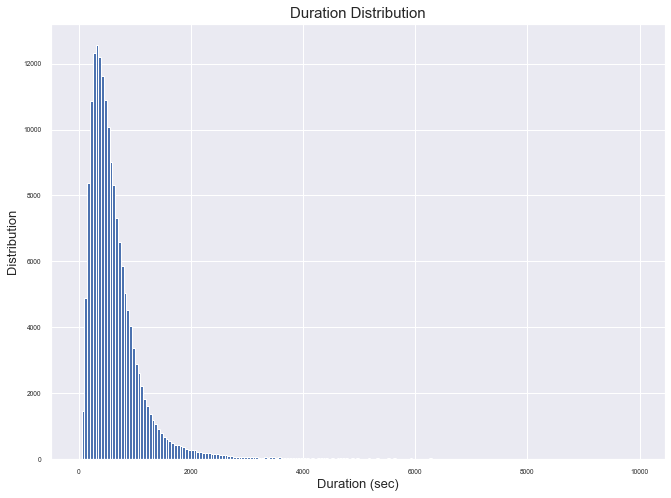

In [265]:
#set canvas size and plotting
plt.figure(figsize=(11,8))
bins = np.arange(0, 10000, 50)

plt.hist(x='duration_sec',data = dv, bins=bins)
plt.title('Duration Distribution', {'fontsize': 15})
plt.xlabel('Duration (sec)', {'fontsize': 13})
plt.ylabel("Distribution", {'fontsize': 13});

#### Observation and Insight
The distribution of the Duration in seconds has positive skewness. In other word, its skewed to the right.

### 2. User Type Distribution

In [266]:
dv['duration_sec'].value_counts()

272      308
323      285
305      282
369      280
306      276
        ... 
39478      1
4187       1
15123      1
32055      1
7958       1
Name: duration_sec, Length: 4429, dtype: int64

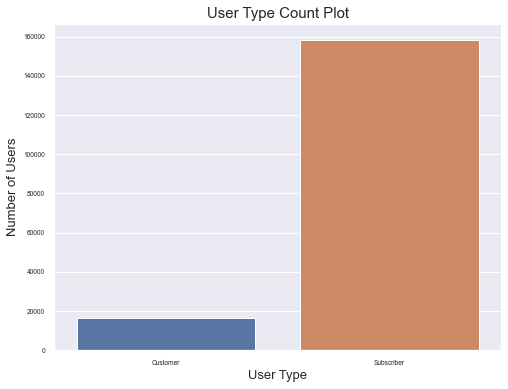

In [343]:
#set canvas size
plt.figure(figsize=(8,6))


sns.countplot(x='user_type', data=dv)
plt.title('User Type Count Plot', {'fontsize': 15})
plt.xlabel('User Type', {'fontsize': 13})
plt.ylabel('Number of Users', {'fontsize': 13});

#### Observation and Insight
After this visualization, its seen that there are more Subscribers than Customers in the Dataset. Customers takes more than 70% of the dataset as demostrated above.

### 3. Bike Share for all Trips Distribution

In [268]:
dv['bike_share_for_all_trip'].value_counts()

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

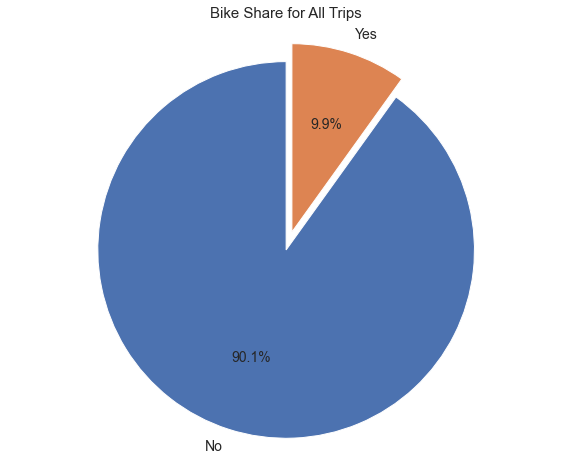

In [269]:
plt.figure(figsize=(10,8))

#create a pie chart and customization
plt.pie(x=dv['bike_share_for_all_trip'].value_counts(), startangle=90, 
        labels= dv['bike_share_for_all_trip'].value_counts().index, 
       autopct = '%1.1f%%', textprops={'fontsize': 14},
       explode=[0.1,0])
plt.title('Bike Share for All Trips', {'fontsize': 15})
plt.axis('equal');

#### Observation and Insight
It can be deduced that there are also very high number of observation that depict not sharing bike for all trips. 90.1% do not share while just 9.9% shared.

### 3. Gender Distribution

In [270]:
dv['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

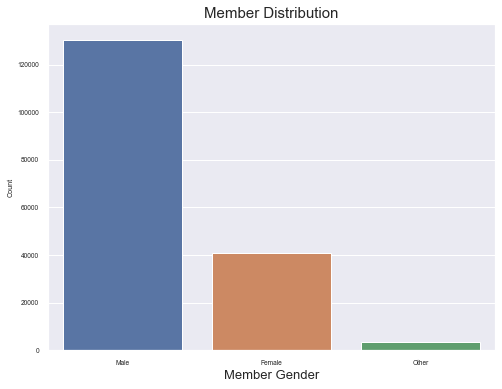

In [271]:
#set canvas size
plt.figure(figsize=(8,6))

#plotting and customization
sns.countplot(x='member_gender', data=dv, order=['Male', 'Female','Other'])
plt.title('Member Distribution', {'fontsize': 15})
plt.xlabel('Member Gender', {'fontsize': 13})
plt.ylabel('Count'), {'fontsize': 13};

#### Observation and Insight
The dataset consists of more Males than Females. Followed by entries with no assigned gender

### 4. Member Birth Year Distribution

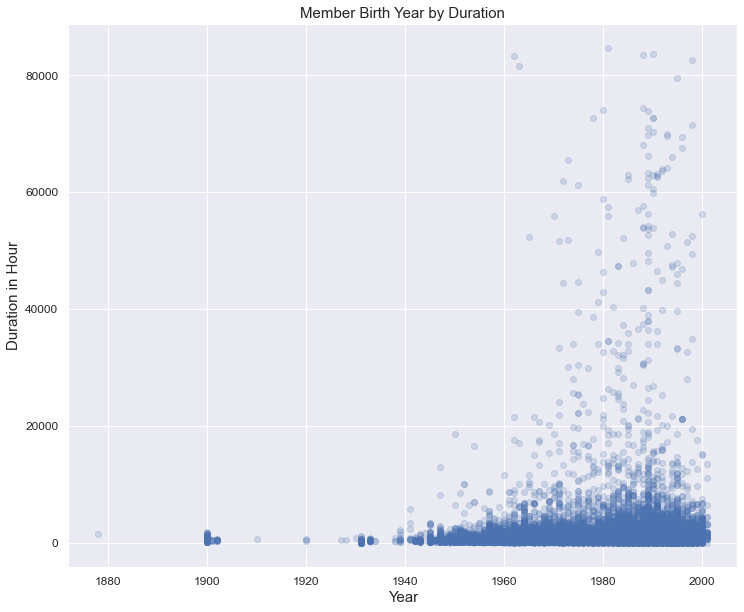

In [362]:
#set canvas size
plt.figure(figsize=(12,10))

#plotting and customization
plt.scatter(data = df, x = 'member_birth_year', y = 'duration_sec', alpha=1/5)
plt.title('Member Birth Year by Duration', {'fontsize': 15})
plt.xlabel('Year', {'fontsize': 15})
plt.ylabel('Duration in Hour', {'fontsize': 15})
plt.xticks(fontsize=(12))
plt.yticks(fontsize=(12));

This visualization tells the fact that there are more youths in the datasets than the older people. people born in the year between 1980 and and 1990

### 5. Top 10 Most used Start Stations

In [273]:
#extract the top to start station
most_start_station = dv['start_station_name'].value_counts().head(10)
most_start_station

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
San Francisco Caltrain (Townsend St at 4th St)               2577
San Francisco Ferry Building (Harry Bridges Plaza)           2541
Howard St at Beale St                                        2216
Steuart St at Market St                                      2191
Powell St BART Station (Market St at 5th St)                 2144
Name: start_station_name, dtype: int64

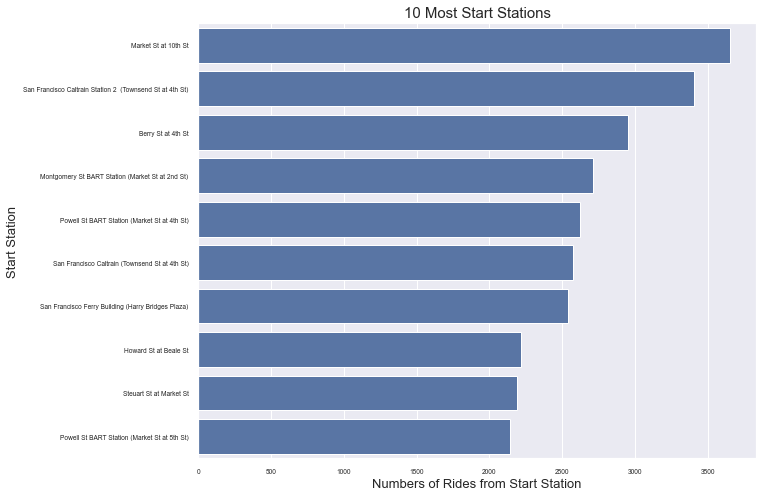

In [274]:
#set canvas size
plt.figure(figsize=(10,8))

#plot and customize chart
sns.barplot(x=most_start_station.values,
            y=most_start_station.index,
            orient='h', color=sns.color_palette()[0])
plt.title('10 Most Start Stations', {'fontsize': 15})
plt.xlabel('Numbers of Rides from Start Station', {'fontsize': 13})
plt.ylabel('Start Station', {'fontsize': 13});

### 10 Rarely used Start Stations

In [275]:
least_start_station = dv['start_station_name'].value_counts().tail(10)
least_start_station

23rd Ave at Foothill Blvd                17
Backesto Park (Jackson St at 13th St)    17
Leavenworth St at Broadway               16
Taylor St at 9th St                      13
Farnam St at Fruitvale Ave                9
Willow St at Vine St                      9
Parker Ave at McAllister St               7
21st Ave at International Blvd            4
Palm St at Willow St                      3
16th St Depot                             2
Name: start_station_name, dtype: int64

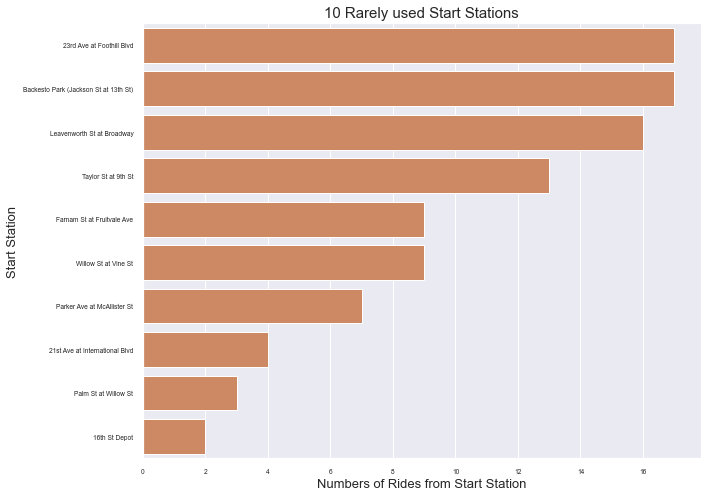

In [276]:
#set canvas size
plt.figure(figsize=(10,8))

#plot and customize chart
sns.barplot(x=least_start_station.values,
            y=least_start_station.index,
            orient='h', color=sns.color_palette()[1])
plt.title('10 Rarely used Start Stations', {'fontsize': 15})
plt.xlabel('Numbers of Rides from Start Station', {'fontsize': 13})
plt.ylabel('Start Station', {'fontsize': 13});

### Top 10 Most used End Stations

In [277]:
most_end_station = dv['end_station_name'].value_counts().head(10)
most_end_station

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
Powell St BART Station (Market St at 4th St)                 2854
Berry St at 4th St                                           2782
The Embarcadero at Sansome St                                2341
Steuart St at Market St                                      2264
Powell St BART Station (Market St at 5th St)                 2153
Name: end_station_name, dtype: int64

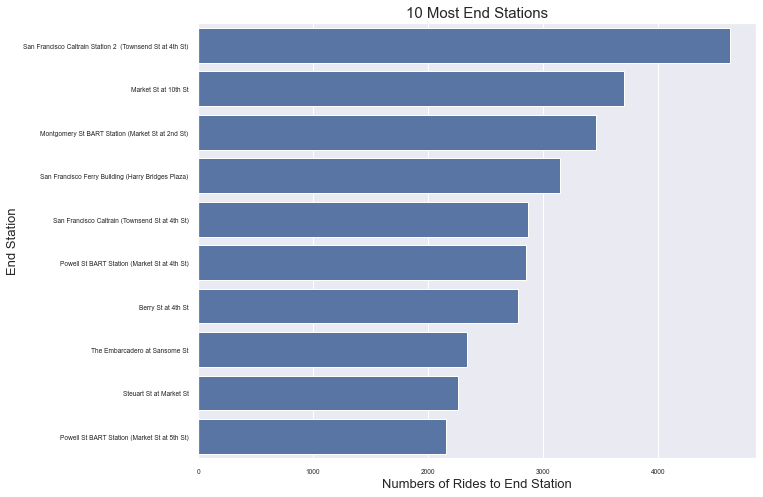

In [278]:
#set canvas size
plt.figure(figsize=(10,8))

#plot and customize chart
sns.barplot(x=most_end_station.values,
            y=most_end_station.index,
            color=sns.color_palette()[0],
            orient='h')
plt.title('10 Most End Stations', {'fontsize': 15})
plt.xlabel('Numbers of Rides to End Station', {'fontsize': 13})
plt.ylabel('End Station', {'fontsize': 13});

### 10 most rarely used End Stations

In [279]:
least_end_station = dv['end_station_name'].value_counts().tail(10)
least_end_station

Backesto Park (Jackson St at 13th St)    18
Foothill Blvd at Harrington Ave          16
Leavenworth St at Broadway               12
Taylor St at 9th St                      11
Farnam St at Fruitvale Ave               10
Parker Ave at McAllister St               9
Palm St at Willow St                      7
16th St Depot                             6
Willow St at Vine St                      5
21st Ave at International Blvd            5
Name: end_station_name, dtype: int64

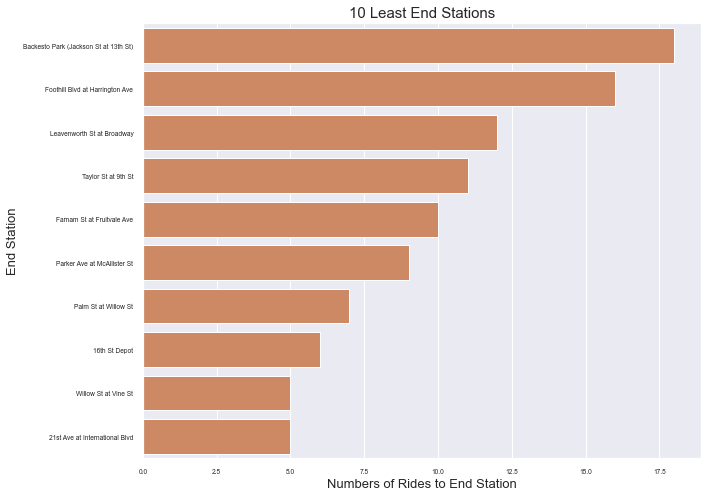

In [280]:
#set canvas size
plt.figure(figsize=(10,8))

#plot and customize chart
sns.barplot(x=least_end_station.values,
            y=least_end_station.index,
            color=sns.color_palette()[1],
            orient='h')
plt.title('10 Least End Stations', {'fontsize': 15})
plt.xlabel('Numbers of Rides to End Station', {'fontsize': 13})
plt.ylabel('End Station', {'fontsize': 13});

#### Observation and insights
After visualizing the `most and least start station` and `most and least end station`. The visualizations above well demonstrated that. 
>1. `Market St at 10th St` is the most used start station while `6th St Depot`  is the least used start station. 
>2. `San Francisco Caltrain Station 2  (Townsend St at 4th St)` is the most used end station while `21st Ave at International Blvd` is the least used end station.

However, i will like to get the most used stations and least used stations either start or end.

In [281]:
#check for the most patroled stations
for s in most_start_station.index:
    if s in most_end_station.index:
        print(s)

Market St at 10th St
San Francisco Caltrain Station 2  (Townsend St at 4th St)
Berry St at 4th St
Montgomery St BART Station (Market St at 2nd St)
Powell St BART Station (Market St at 4th St)
San Francisco Caltrain (Townsend St at 4th St)
San Francisco Ferry Building (Harry Bridges Plaza)
Steuart St at Market St
Powell St BART Station (Market St at 5th St)


##### Above is the list of Most Patroled Stations. There are not only popular, riders use them as start and end stations

In [282]:
#check for the least patroled stations
for s in least_start_station.index:
    if s in least_end_station.index:
        print(s)

Backesto Park (Jackson St at 13th St)
Leavenworth St at Broadway
Taylor St at 9th St
Farnam St at Fruitvale Ave
Willow St at Vine St
Parker Ave at McAllister St
21st Ave at International Blvd
Palm St at Willow St
16th St Depot


##### Above is the list of Least Patroled Stations.

In [342]:
dv.to_csv('cleaned_data.csv')

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The dataset consists of a larger number of riders who dont share the bike in all trips. Also, we have more Male riders than female; more Subscribers than Customers in the dataset

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Few issues were encountered while investigating the data, some columns are in wrong datatypes. I converted them to the appropraite data type in other to suit the requirements when insights are to be drawn from them. The data set also consist of null values in columns of main interest which are mainly categorical columns. so i had to drop those entries by row. 

### BIVARIATE VISUALIZATION

### User Type Distribution with Gender Classification

In [283]:
user = dv['user_type'].value_counts()
user

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

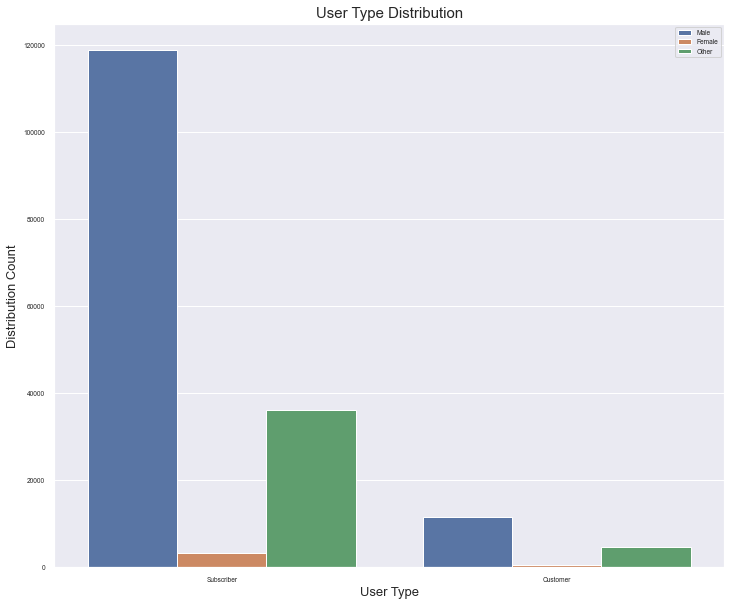

In [284]:
#set canvas size
plt.figure(figsize=(12,10))

#plotting
sns.countplot(x='user_type', 
              data=dv, hue='member_gender', 
              order=['Subscriber', 'Customer'])

#customize plot
plt.title('User Type Distribution', {'fontsize': 15})
plt.xlabel('User Type', {'fontsize': 13})
plt.ylabel('Distribution Count', {'fontsize': 13})
plt.legend(['Male','Female', 'Other']);

#### Observation and insights
After filtering out gender base from each user type, its seen that, Male gender are still the main Subscriber and most customers.

### User Type by Average Duration

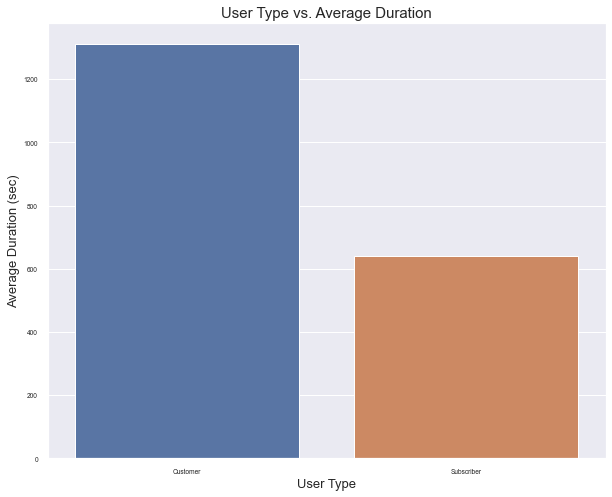

In [341]:
#set canvas size
plt.figure(figsize=(10,8))

#plot and customize plot
sns.barplot(x='user_type', y='duration_sec', data=dv, ci=False)
plt.title('User Type vs. Average Duration', {'fontsize': 15})
plt.xlabel('User Type', {'fontsize': 13})
plt.ylabel('Average Duration (sec)', {'fontsize': 13});

#### Observation and Insight
The visualization shows that Customers have higher average ride duration than subscribers. 

###  Bike Share by Average Duration

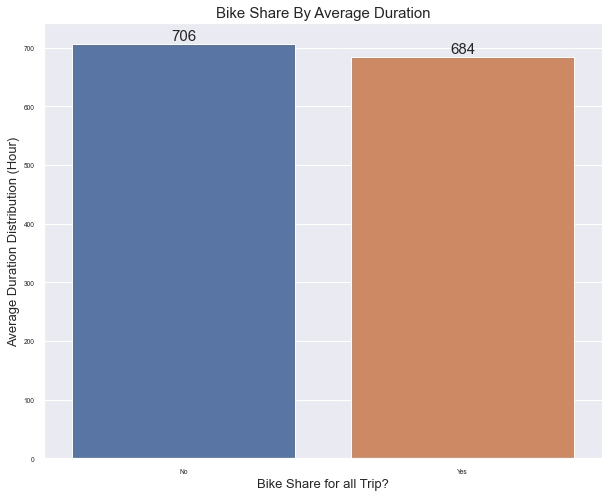

In [286]:
from numpy import mean
plt.figure(figsize=(10,8))

plots = sns.barplot(x='bike_share_for_all_trip', 
            y='duration_sec',
            data=dv, estimator=mean, ci=None)

#add annotation using matplotlib annotate function
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.title('Bike Share By Average Duration', {'fontsize': 15})
plt.xlabel('Bike Share for all Trip?', {'fontsize': 13})
plt.ylabel('Average Duration Distribution (sec)', {'fontsize': 13});

#### Observation and Insight
The total average duration of the those who dont share their bike in all trips is greater than those who do.

### User Type Distribution 

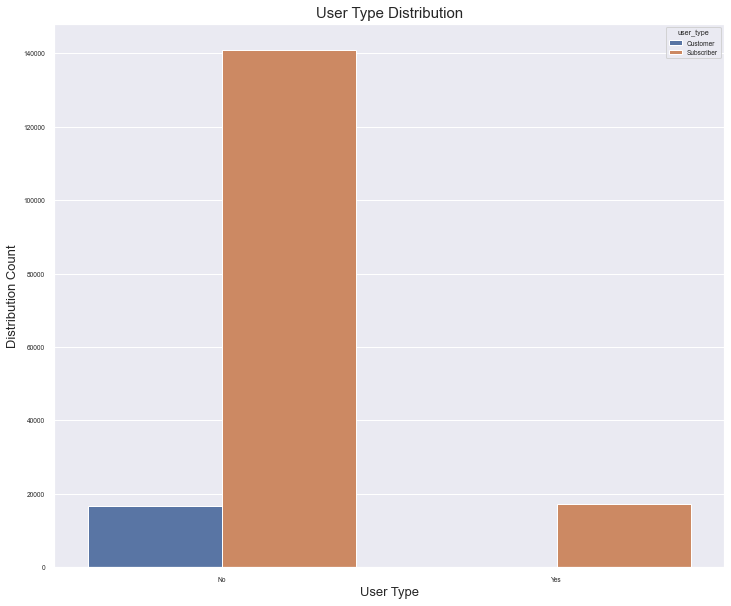

In [287]:
#set canvas size
plt.figure(figsize=(12,10))

#plotting
sns.countplot(x='bike_share_for_all_trip', 
              data=dv,hue='user_type', 
              order=['No', 'Yes'])

#chart customization
plt.title('User Type Distribution', {'fontsize': 15})
plt.xlabel('User Type', {'fontsize': 13})
plt.ylabel('Distribution Count', {'fontsize': 13});

#### Obersavetion and Insights
After plotting the distribution of bike share for all tripe grouped stacked by user type, i see that No subscriber share their bike for all trips. This can be deduced that only the Customers share their bike.

### Duration Distribution by `bike_share_for_all_trip and member_gender` 

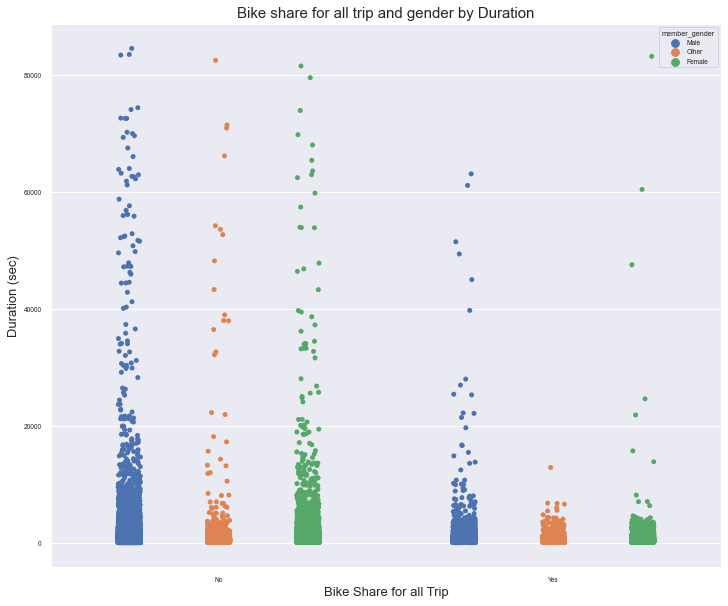

In [346]:
#set canvas size
plt.figure(figsize=(12,10))

#plotting
sns.stripplot(x='bike_share_for_all_trip', 
            y='duration_sec',
            data=dv,
            jitter=True,
            order=['No', 'Yes'], 
            hue='member_gender',
            dodge=True)

#plot customization
plt.title('Bike share for all trip and gender by Duration', {'fontsize': 15})
plt.xlabel('Bike Share for all Trip', {'fontsize': 13})
plt.ylabel('Duration (sec)', {'fontsize': 13});

#### Observation and Insight
Obviously, 'No bike share' takes higher percentage of the dataset as it has been show in many plot before this, nevertheless, amongst those who share their bike, we can see that the distribution of Male takes the lead.

### Multivariate

#### I will like to start by comparing more than two variables to my main variable of interest (bike_share_for_trip)

<Figure size 720x576 with 0 Axes>

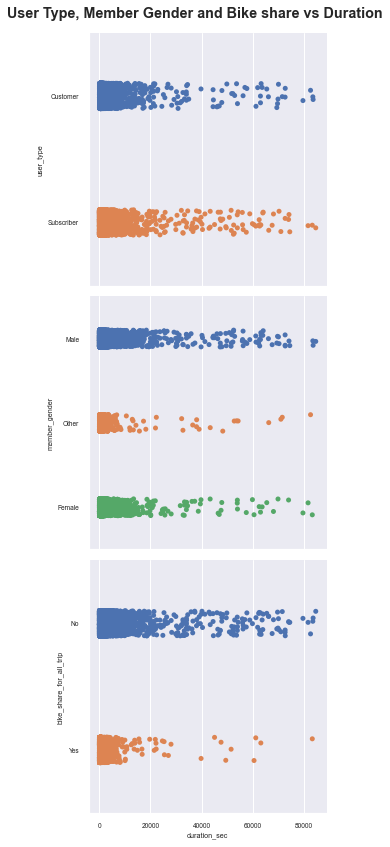

In [325]:
plt.figure(figsize=(10,8))
g = sns.PairGrid(data = dv, x_vars = ['duration_sec'],y_vars = ['user_type','member_gender', 'bike_share_for_all_trip'], height=4)
g.map(sns.stripplot)
# Title for the complete figure
g.fig.suptitle("User Type, Member Gender and Bike share vs Duration" ,
               fontsize = 'x-large' , 
               fontweight = 'bold' )

# Adjust subplots so that titles don't overlap
g.fig.subplots_adjust( top = 0.95 );

After plotting the variables together, it gives a broad features amongst one another. The followings are extracts from the visualization.
>1. Subscriber has the highest distribution in the dataset
>2. Male Gender is the most rider
>3. A larger portion of the users do not share their bike for all trips

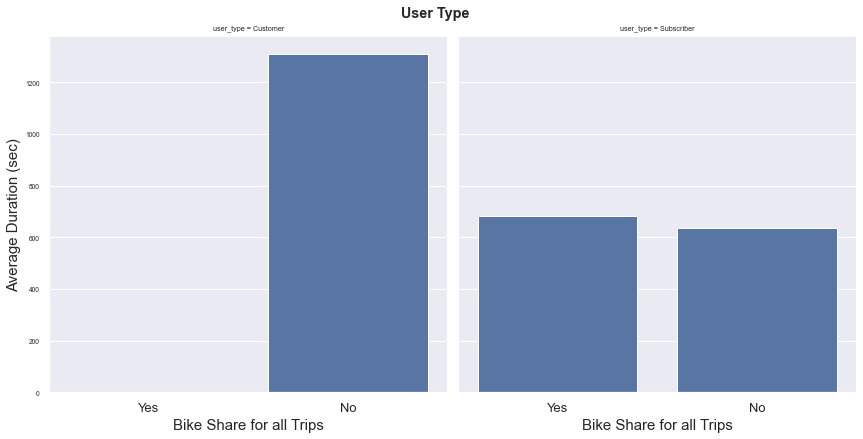

In [352]:
g = sns.FacetGrid(data = dv, col = 'user_type', palette = sns.color_palette()[0:1], height=6)
g.map(sns.barplot, 'bike_share_for_all_trip', 'duration_sec', order = ['Yes', 'No'],  ci=False)

# Title for the complete figure
g.fig.suptitle("User Type" ,
               fontsize = 'x-large' , 
               fontweight = 'bold' )

# Adjust subplots so that titles don't overlap
g.fig.subplots_adjust( top = 0.91 )

g.set_xticklabels(fontsize= 13)
#g.set_yticklabels(fontsize= 13)
g.set_axis_labels( "Bike Share for all Trips" , "Average Duration (sec)", fontsize= 15);

### Observation and Insight
Suprisingly, No customer share their bike for all trips. Possibly, there could be a factor like special offers for Subscribers or sharing bike is only meant for those who subscribe only. Also higher percentage of Subscriber share their bike for all trips

In [2]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.7/158.7 kB 3.6 MB/s eta 0:00:00a 0:00:01


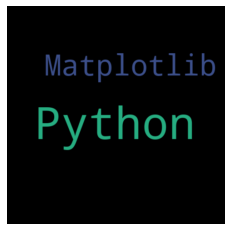

In [3]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text=("Python Python Python Matplotlib")

# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)